In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="Set2")



#synthetic dataset 
np.random.seed(42)

n = 1000
dates = pd.date_range('2022-01-01', '2024-12-31')
product_categories = ['Machinery', 'Tools', 'Electrical', 'Automotive', 'Industrial Supplies']
regions = ['North', 'South', 'East', 'West']
customer_types = ['Corporate', 'Distributor', 'Retail']
sales_channels = ['Online', 'Offline']

data = {
    'Order_ID': np.arange(1001, 1001+n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice(['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt', 
                                      'Drill', 'Motor', 'Valve', 'Gearbox'], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n),
    'Sales_Channel': np.random.choice(sales_channels, n)
}

df = pd.DataFrame(data)

# Derived metrics
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
df['Profit'] = df['Total_Sales'] * np.random.uniform(0.05, 0.25, n)
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month_name()


print("\n Dataset Info")
print(df.info())
print("Dataset Overview:")
print(df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:")
display(df.describe())
df.head()



 Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Product_Category  1000 non-null   object        
 3   Product_Name      1000 non-null   object        
 4   Region            1000 non-null   object        
 5   Customer_Type     1000 non-null   object        
 6   Units_Sold        1000 non-null   int32         
 7   Unit_Price        1000 non-null   int32         
 8   Discount          1000 non-null   float64       
 9   Sales_Channel     1000 non-null   object        
 10  Total_Sales       1000 non-null   float64       
 11  Profit            1000 non-null   float64       
 12  Year              1000 non-null   int32         
 13  Month             1000 non-null   object        
dtypes: datetim

,Order_ID,Date,Units_Sold,Unit_Price,Discount,Total_Sales,Profit,Year
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,2023-07-18 22:48:00.000000256,108.630000,2754.086000,0.124913,260449.112832,38645.062865,2023.058000
min,1001.000000,2022-01-01 00:00:00,10.000000,501.000000,0.000236,4175.827372,484.682509,2022.000000
25%,1250.750000,2022-09-26 18:00:00,61.750000,1627.000000,0.062920,101091.130224,12801.699040,2022.000000
50%,1500.500000,2023-08-16 00:00:00,112.000000,2738.500000,0.122601,210238.732120,27299.763368,2023.000000
75%,1750.250000,2024-04-15 12:00:00,156.250000,3890.500000,0.185230,386008.810611,51742.561573,2024.000000
max,2000.000000,2024-12-31 00:00:00,199.000000,4993.000000,0.249838,937819.725822,192916.195648,2024.000000
std,288.819436,NaN,55.405658,1298.717355,0.072212,191216.496027,34665.458292,0.825419


,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit,Year,Month
0,1001,2024-05-10,Tools,Valve,North,Corporate,31,805,0.111682,Online,22167.985243,5207.962945,2024,May
1,1002,2024-12-31,Machinery,Gearbox,West,Retail,83,1407,0.030862,Online,113176.850305,17364.314261,2024,December
2,1003,2024-11-10,Industrial Supplies,Valve,East,Retail,190,3154,0.051495,Online,568401.100925,41727.963290,2024,November
3,1004,2022-05-02,Machinery,Pump,East,Retail,141,4292,0.000236,Online,605029.267874,94164.059414,2022,May
4,1005,2023-04-12,Tools,Valve,West,Corporate,32,4542,0.009816,Online,143917.265083,10847.701340,2023,April


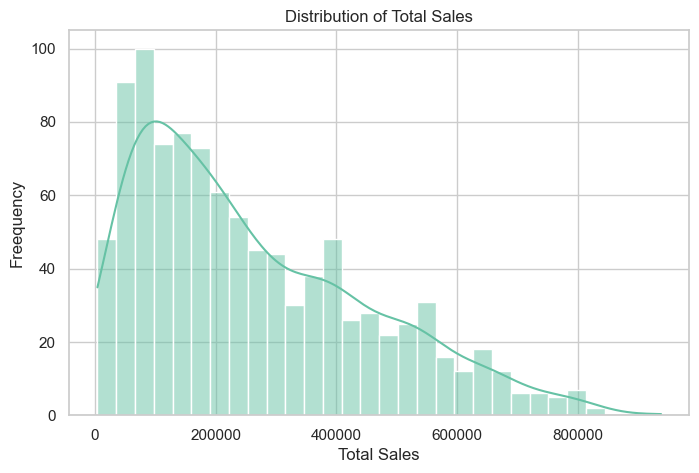

In [2]:
#Univeriate analysys

#Total Sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.xlabel('Total Sales')
plt.ylabel('Freequency')
plt.title("Distribution of Total Sales")
plt.show()

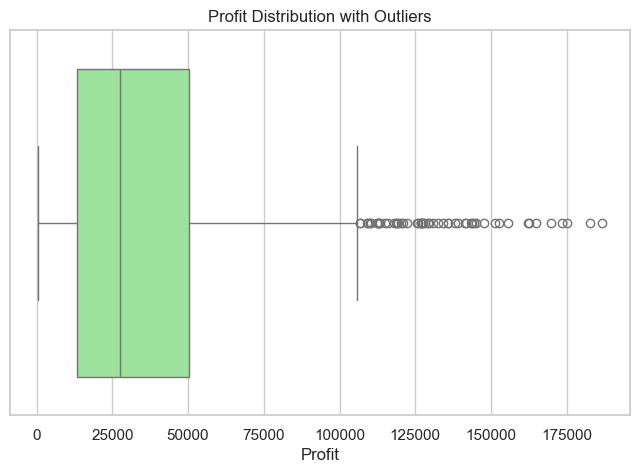

In [24]:
#Profit boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Profit'],color='lightgreen')
plt.title("Profit Distribution with Outliers")
plt.show()

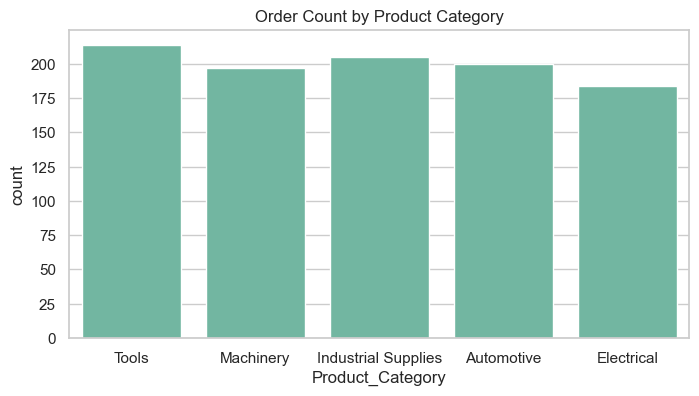

In [4]:
#Product Category countplot
plt.figure(figsize=(8,4))
sns.countplot(x='Product_Category', data=df)
plt.title("Order Count by Product Category")
plt.show()

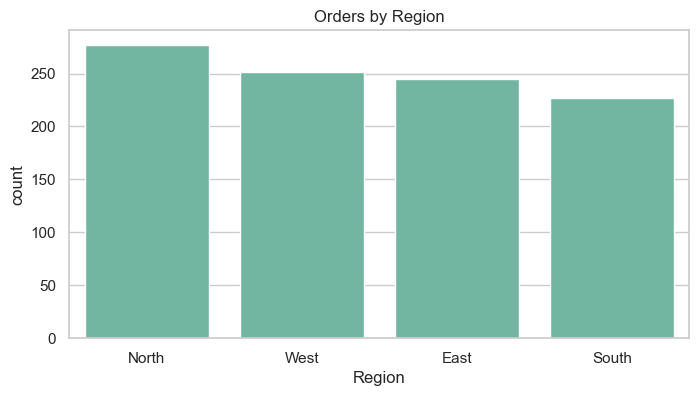

In [5]:
#Region countplot
plt.figure(figsize=(8,4))
sns.countplot(x='Region', data=df)
plt.title("Orders by Region")
plt.show()

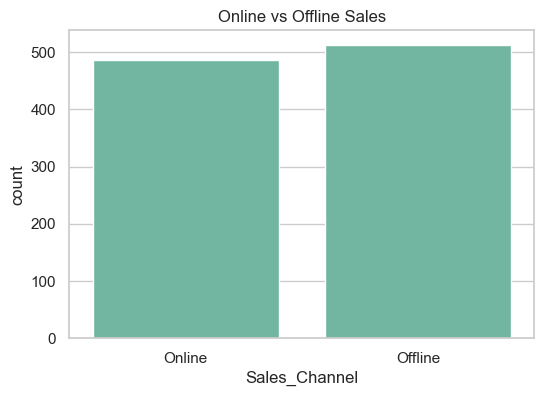

In [6]:
#Sales Channel countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Sales_Channel', data=df)
plt.title("Online vs Offline Sales")
plt.show()

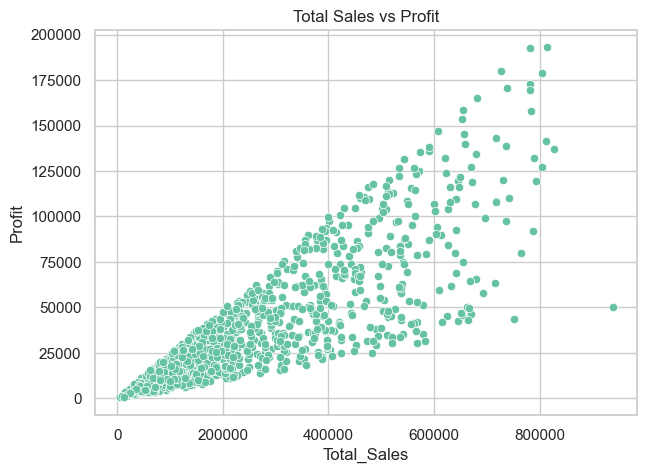

In [7]:
#Bivariate Analysis
#Total Sales vs Profit
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Sales', y='Profit', data=df)
plt.title("Total Sales vs Profit")
plt.show()

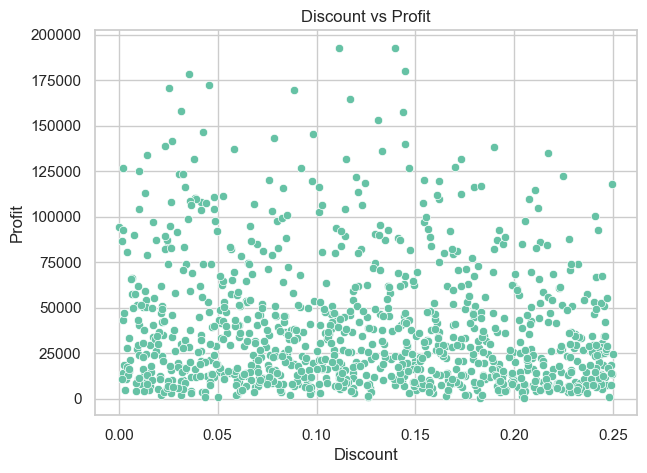

In [8]:
#Discount vs Profit
plt.figure(figsize=(7,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

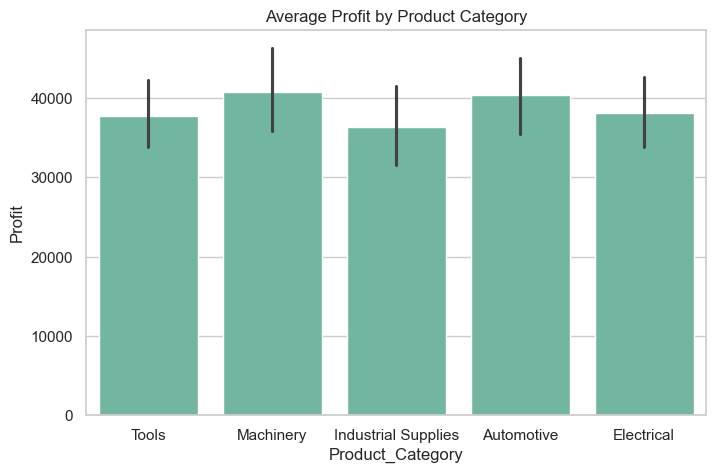

In [9]:
#Product Category vs Profit
plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Profit', data=df, estimator=np.mean)
plt.title("Average Profit by Product Category")
plt.show()

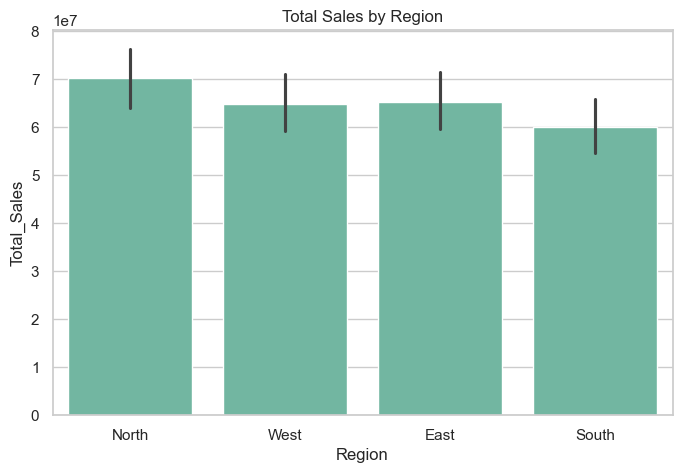

In [10]:
#Region vs Total Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=df, estimator=np.sum)
plt.title("Total Sales by Region")
plt.show()


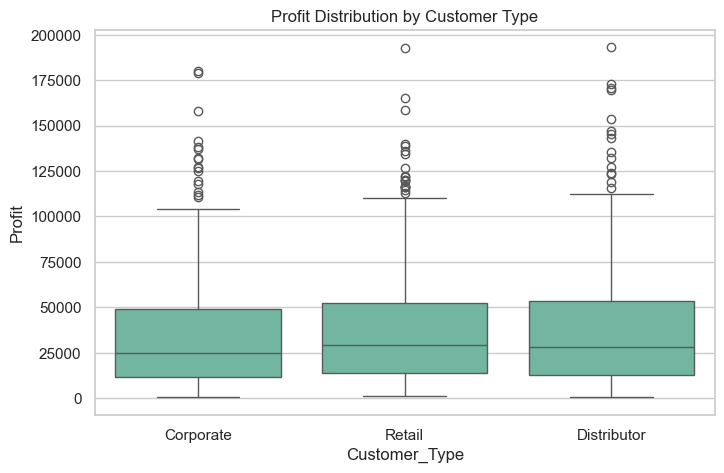

In [11]:
#Customer Type vs Profit
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer_Type', y='Profit', data=df)
plt.title("Profit Distribution by Customer Type")
plt.show()

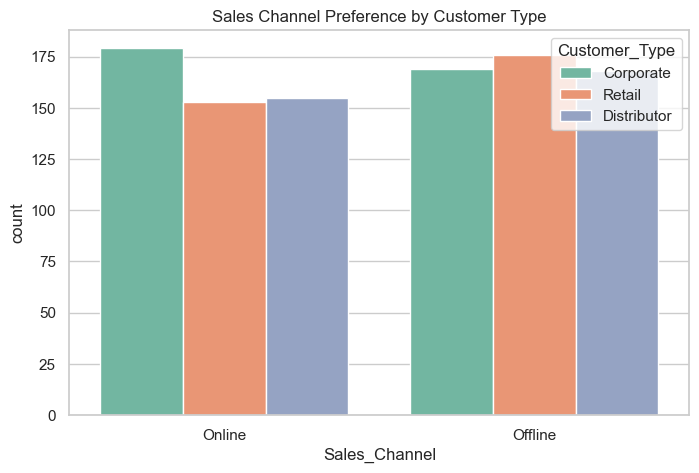

In [12]:
#Sales Channel vs Customer Type
plt.figure(figsize=(8,5))
sns.countplot(x='Sales_Channel', hue='Customer_Type', data=df)
plt.title("Sales Channel Preference by Customer Type")
plt.show()

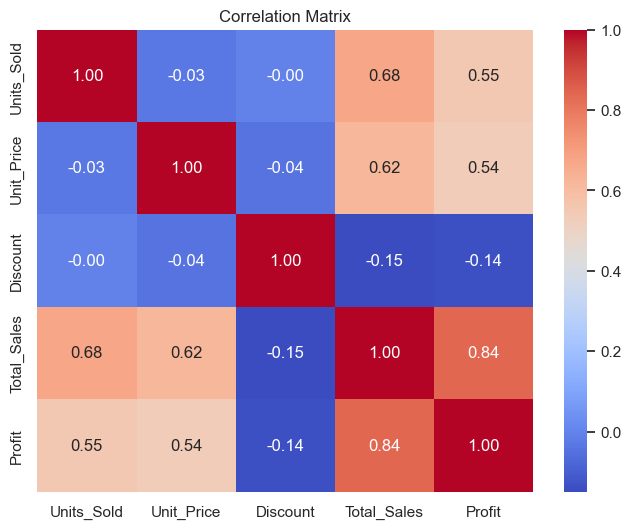

In [13]:
#Correlation Matrix

plt.figure(figsize=(8,6))
corr = df[['Units_Sold','Unit_Price','Discount','Total_Sales','Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


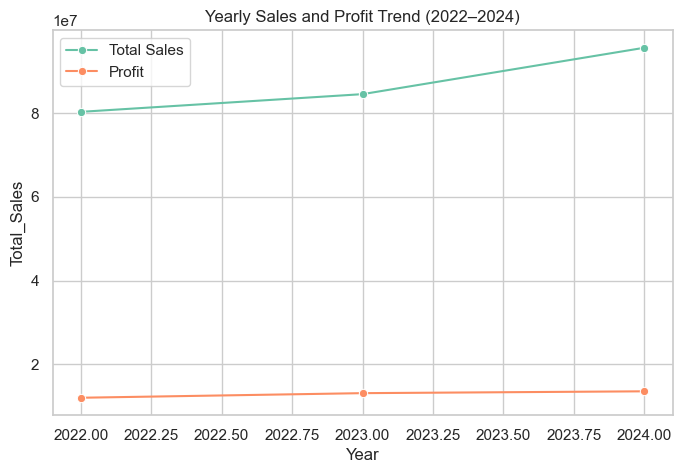

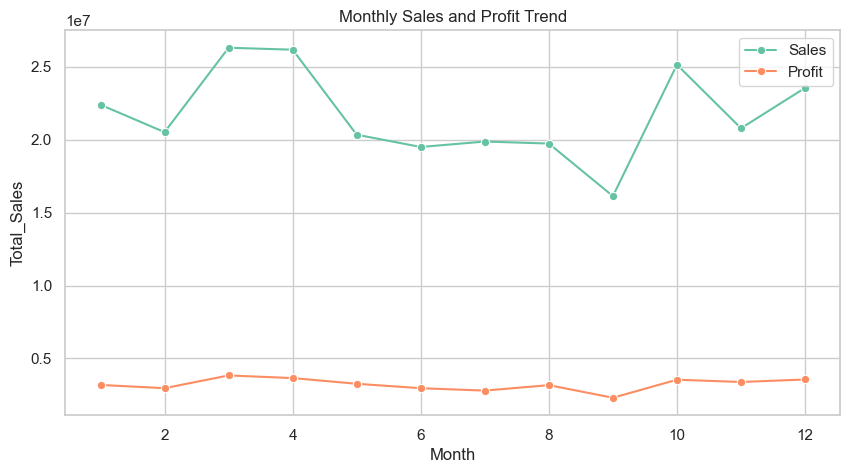

In [15]:
#Trend Analysis)

#Yearly Trend
yearly_trend = df.groupby('Year')[['Total_Sales','Profit']].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Total_Sales', data=yearly_trend, marker='o', label='Total Sales')
sns.lineplot(x='Year', y='Profit', data=yearly_trend, marker='o', label='Profit')
plt.title("Yearly Sales and Profit Trend (2022–2024)")
plt.legend()
plt.show()

#Monthly Trend
df['Month_Num'] = pd.DatetimeIndex(df['Date']).month
monthly_trend = df.groupby('Month_Num')[['Total_Sales','Profit']].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Month_Num', y='Total_Sales', data=monthly_trend, marker='o', label='Sales')
sns.lineplot(x='Month_Num', y='Profit', data=monthly_trend, marker='o', label='Profit')
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Month")
plt.legend()
plt.show()


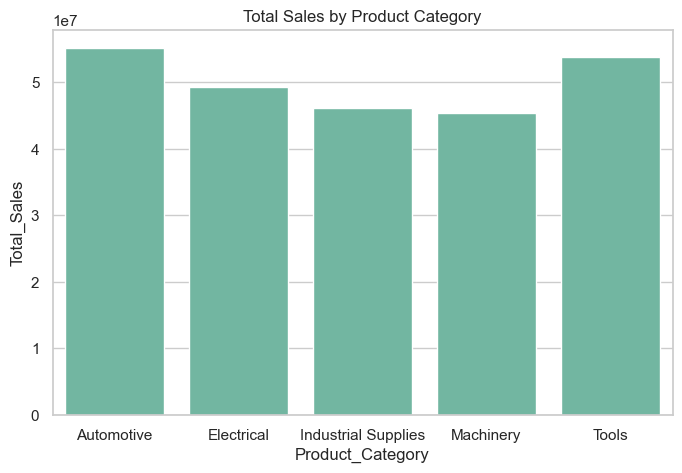

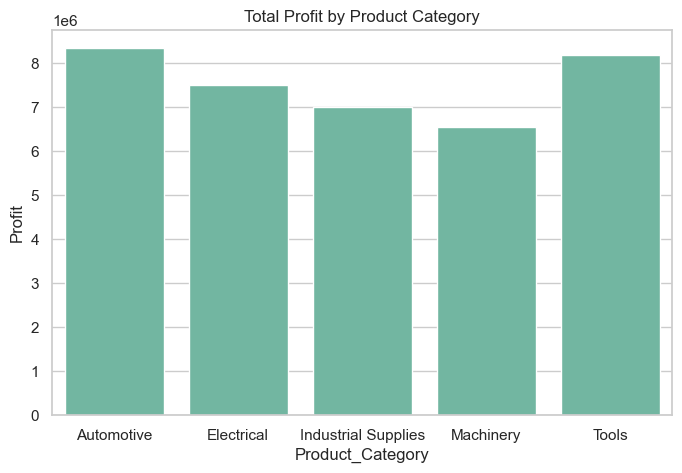

In [ ]:
category_performance = df.groupby('Product_Category')[['Total_Sales','Profit']].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Total_Sales', data=category_performance)
plt.title("Total Sales by Product Category")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Product_Category', y='Profit', data=category_performance)
plt.title("Total Profit by Product Category")
plt.show()


In [26]:
category_performance['Sales_Share_%'] = (category_performance['Total_Sales'] / category_performance['Total_Sales'].sum()) * 100
display(category_performance)

,Product_Category,Total_Sales,Profit,Sales_Share_%
0,Automotive,5.507370e+07,8.342236e+06,22.067610
1,Electrical,4.926020e+07,7.512333e+06,19.738183
2,Industrial Supplies,4.604911e+07,7.008364e+06,18.451523
3,Machinery,4.542904e+07,6.553784e+06,18.203066
4,Tools,5.375601e+07,8.183494e+06,21.539619
